# TRAFFIC SIGN CLASSIFICATION 
---
## FOR REFERENCE
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

# IMAGE VISUALIZATION

27

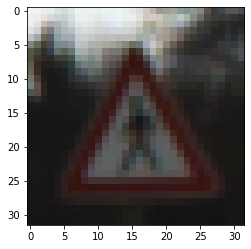

In [6]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

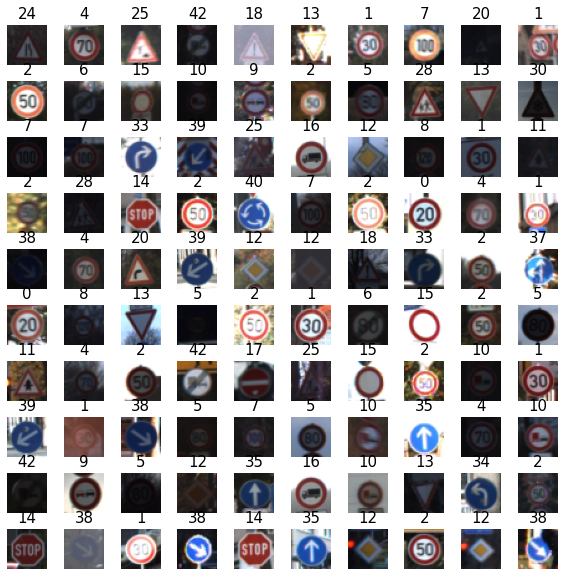

In [7]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid*L_grid):
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)
        

# CONVERTING IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [8]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [9]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [10]:
X_train_gray.shape

(34799, 32, 32, 1)

In [11]:
X_train_gray_norm = (X_train_gray -128)/128
X_test_gray_norm = (X_test_gray -128)/128
X_validation_gray_norm = (X_validation_gray -128)/128

In [12]:
X_train_gray_norm

array([[[[-0.875     ],
         [-0.86197917],
         [-0.875     ],
         ...,
         [-0.828125  ],
         [-0.83333333],
         [-0.82552083]],

        [[-0.88020833],
         [-0.875     ],
         [-0.88541667],
         ...,
         [-0.82552083],
         [-0.83072917],
         [-0.83072917]],

        [[-0.8828125 ],
         [-0.875     ],
         [-0.87760417],
         ...,
         [-0.828125  ],
         [-0.828125  ],
         [-0.83072917]],

        ...,

        [[-0.86979167],
         [-0.875     ],
         [-0.875     ],
         ...,
         [-0.80208333],
         [-0.77604167],
         [-0.84895833]],

        [[-0.875     ],
         [-0.86979167],
         [-0.86458333],
         ...,
         [-0.796875  ],
         [-0.77864583],
         [-0.85416667]],

        [[-0.86979167],
         [-0.87239583],
         [-0.8671875 ],
         ...,
         [-0.80989583],
         [-0.79427083],
         [-0.8515625 ]]],


       [[[ 0.15885417],


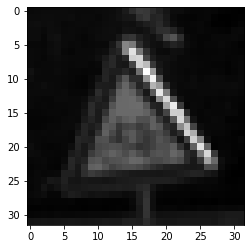

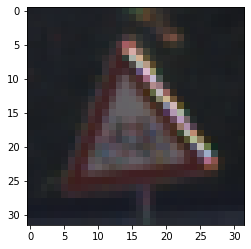

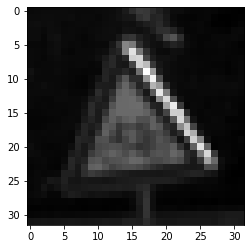

In [13]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# BUILDING THE DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [14]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation ='relu', input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))
CNN.add(layers.Conv2D(16, (5,5), activation ='relu'))
CNN.add(layers.AveragePooling2D())


CNN.add(layers.Flatten())
CNN.add(layers.Dense(120, activation ='relu'))
CNN.add(layers.Dense(84, activation ='relu'))
CNN.add(layers.Dense(43, activation ='softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

# COMPILING AND TRAININGTHE MODEL

In [15]:
CNN.compile(optimizer ='Adam', loss ='sparse_categorical_crossentropy', metrics =['accuracy'])

In [16]:
history = CNN.fit(X_train_gray_norm,
                 y_train,
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))
                  

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 12s 331us/sample - loss: 3.2921 - accuracy: 0.1354 - val_loss: 2.9471 - val_accuracy: 0.2302
Epoch 2/50
34799/34799 [==============================] - 6s 176us/sample - loss: 2.0446 - accuracy: 0.4360 - val_loss: 1.6447 - val_accuracy: 0.5587
Epoch 3/50
34799/34799 [==============================] - 6s 178us/sample - loss: 1.2866 - accuracy: 0.6266 - val_loss: 1.2164 - val_accuracy: 0.6501
Epoch 4/50
34799/34799 [==============================] - 6s 181us/sample - loss: 0.9589 - accuracy: 0.7160 - val_loss: 0.9629 - val_accuracy: 0.7050
Epoch 5/50
34799/34799 [==============================] - 6s 183us/sample - loss: 0.7899 - accuracy: 0.7639 - val_loss: 0.8550 - val_accuracy: 0.7358
Epoch 6/50
34799/34799 [==============================] - 6s 185us/sample - loss: 0.6765 - accuracy: 0.8011 - val_loss: 0.7869 - val_accuracy: 0.7780
Epoch 7/50
34799/34799 [==========================

# ASSESSING TRAINED CNN MODEL PERFORMANCE 

In [17]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 1s 104us/sample - loss: 0.7395 - accuracy: 0.8984
Test Accuracy: 0.8984164595603943


In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Valiadation Loss')

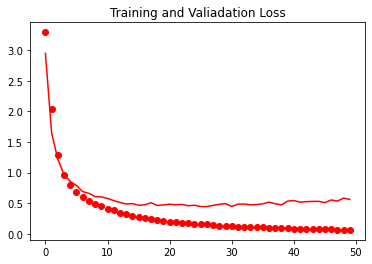

In [20]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label ='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Valiadation Loss')

Text(0.5, 1.0, 'Training and Valiadation Accuracy')

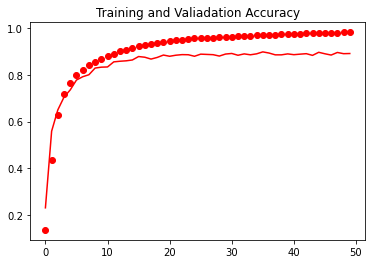

In [21]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label ='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Valiadation Accuracy')

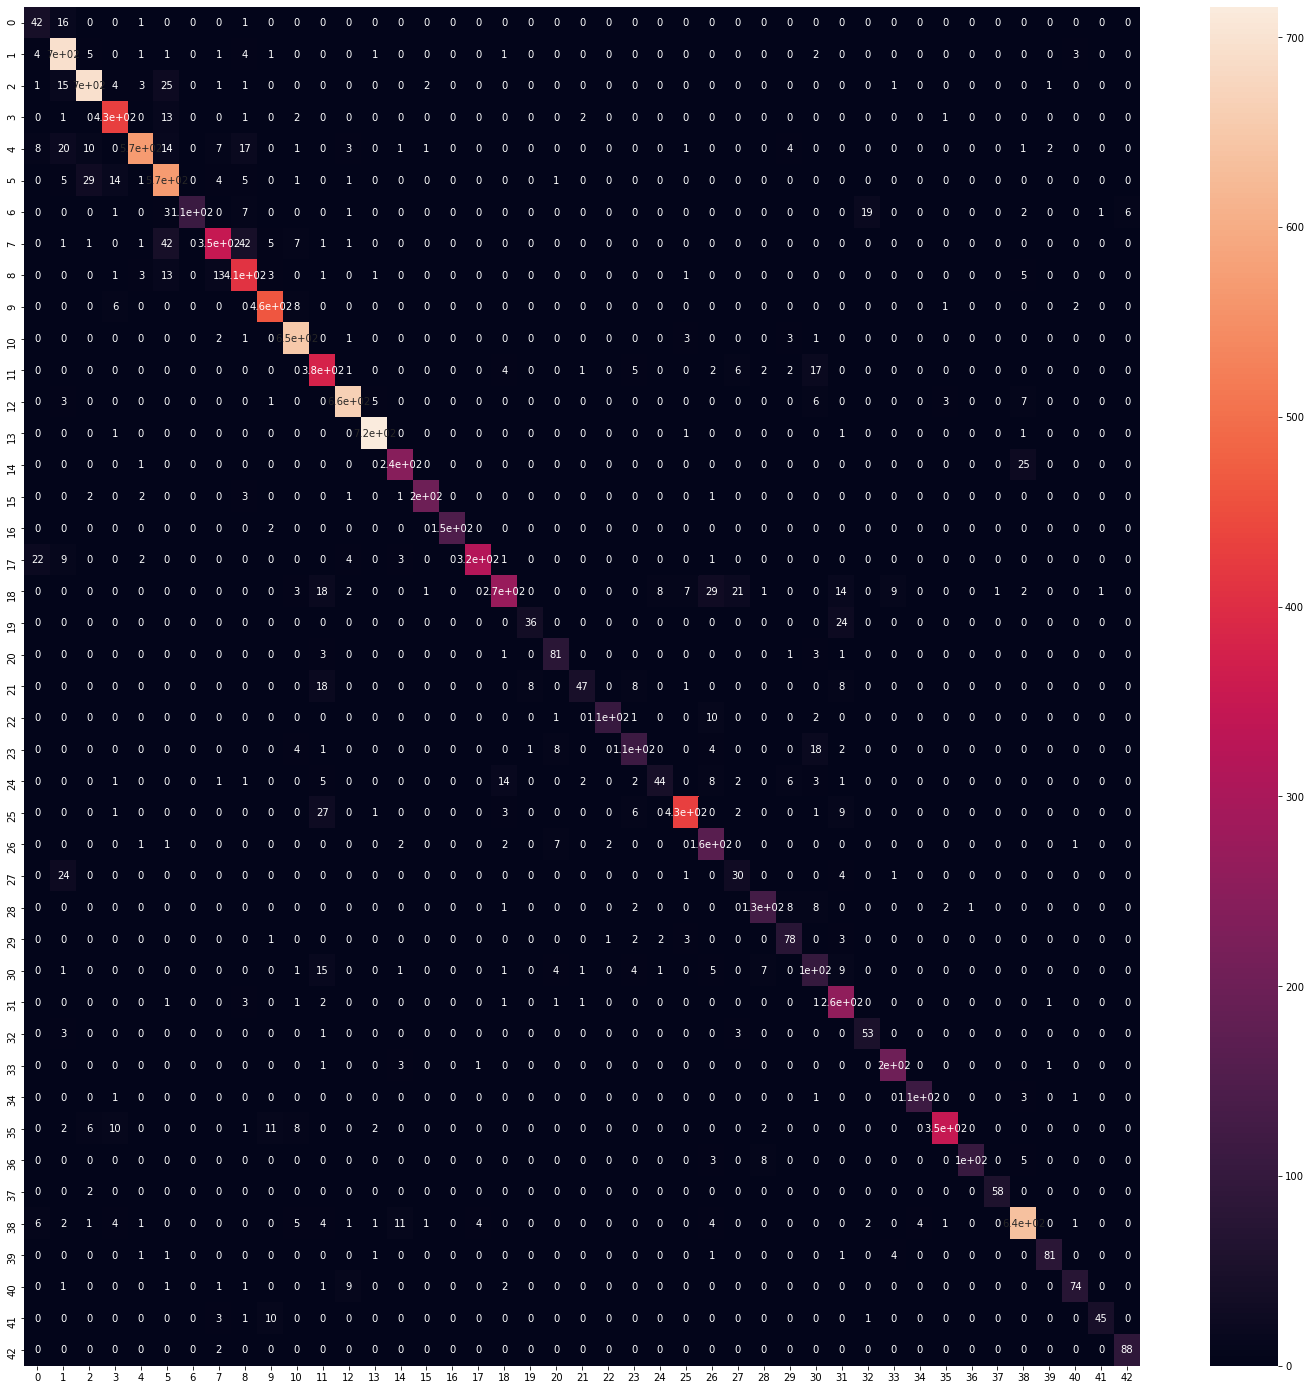

In [22]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

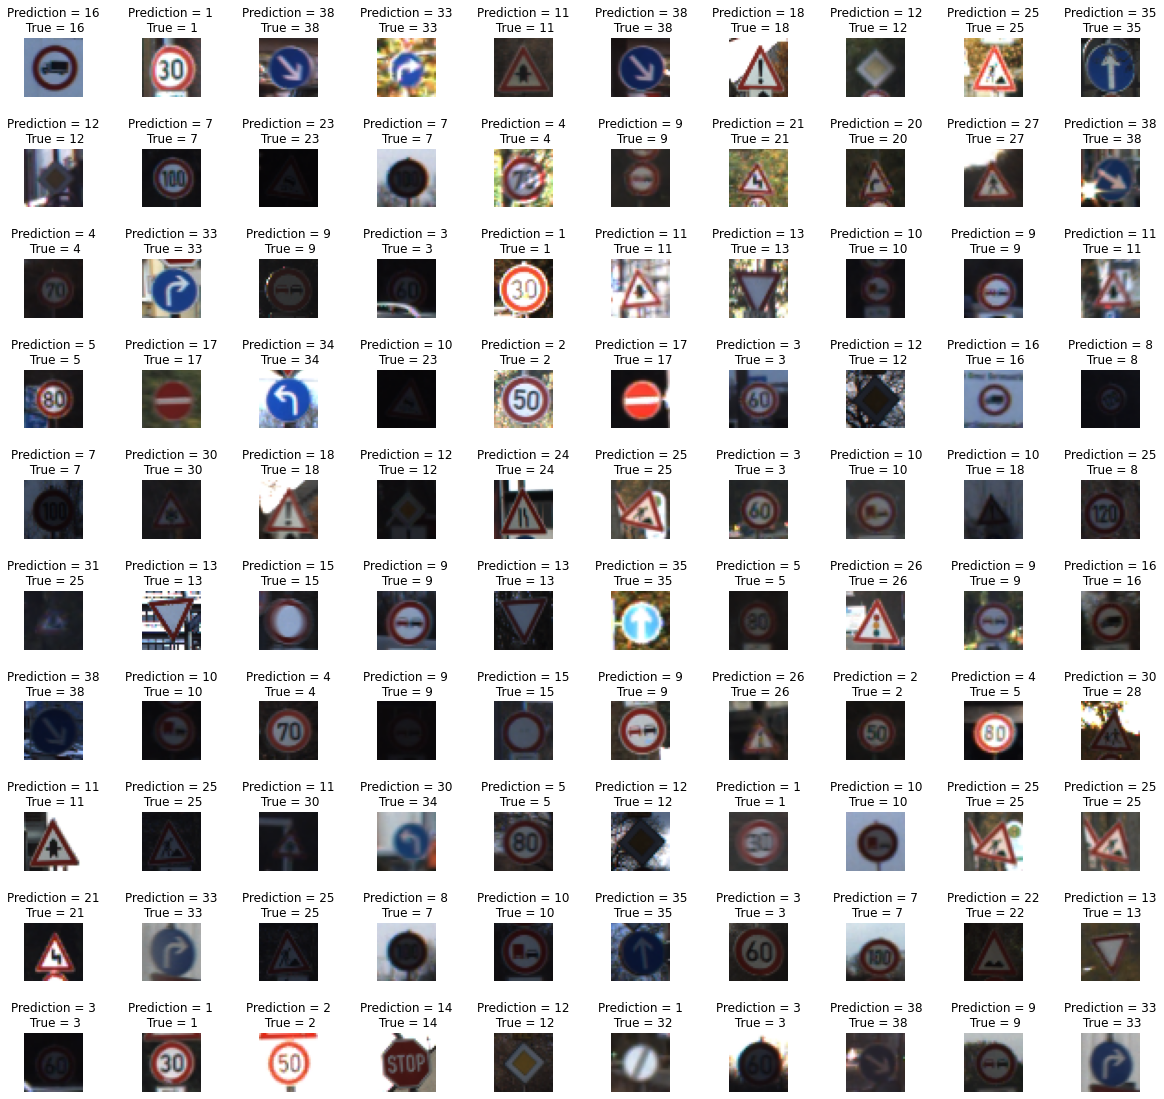

In [26]:
L = 10
W = 10

fig, axes = plt.subplots(L, W, figsize = (20, 20))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    